# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1M4LO6727OIpa4_IXeWQKmUbN9nMpfDDJ/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


## Grading = 10 Points

In [108]:
# @title Download the datasets and install packages
# !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
# !unzip -qq Ravdess_Tess.zip
# Install packages
# !pip -qq install librosa soundfile
# !pip -qq install wavio

from utility import download_and_unzip, download_if_missing
import os

if not os.path.exists("Tess") and not os.path.exists("ravdess"):
    download_and_unzip(
        filename="Ravdess_Tess.zip",
        url="https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip",
    )


print("Datasets downloaded successfully!")


Datasets downloaded successfully!


### Import Neccesary Packages

In [149]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript

# from google.colab import output
from base64 import b64decode
import warnings

warnings.filterwarnings("ignore")
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier

import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier


### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [110]:
# YOUR CODE HERE
# load Tess dataset
tess_wav_files = glob.glob("Tess/*/*.wav")
print(f"number of tess file: {len(tess_wav_files)}")
# see the first 10 files
print(ravdess_wav_files[:10])

# load ravdess dataset
ravdess_wav_files = glob.glob("ravdess/*/*.wav")
print(f"number of ravdess file: {len(ravdess_wav_files)}")
# see the first 10 files
print(ravdess_wav_files[:10])


number of tess file: 2679
['ravdess/Actor_16/03-01-07-02-02-01-16_disgust.wav', 'ravdess/Actor_16/03-01-04-01-01-02-16_sad.wav', 'ravdess/Actor_16/03-01-06-02-01-01-16_fear.wav', 'ravdess/Actor_16/03-01-04-02-02-01-16_sad.wav', 'ravdess/Actor_16/03-01-06-01-01-02-16_fear.wav', 'ravdess/Actor_16/03-01-03-02-02-01-16_happy.wav', 'ravdess/Actor_16/03-01-05-01-02-02-16_angry.wav', 'ravdess/Actor_16/03-01-05-02-02-02-16_angry.wav', 'ravdess/Actor_16/03-01-03-01-02-01-16_happy.wav', 'ravdess/Actor_16/03-01-06-01-02-01-16_fear.wav']
number of ravdess file: 1168
['ravdess/Actor_16/03-01-07-02-02-01-16_disgust.wav', 'ravdess/Actor_16/03-01-04-01-01-02-16_sad.wav', 'ravdess/Actor_16/03-01-06-02-01-01-16_fear.wav', 'ravdess/Actor_16/03-01-04-02-02-01-16_sad.wav', 'ravdess/Actor_16/03-01-06-01-01-02-16_fear.wav', 'ravdess/Actor_16/03-01-03-02-02-01-16_happy.wav', 'ravdess/Actor_16/03-01-05-01-02-02-16_angry.wav', 'ravdess/Actor_16/03-01-05-02-02-02-16_angry.wav', 'ravdess/Actor_16/03-01-03-01-02-0

#### Play the sample audio

In [111]:
# YOUR CODE HERE
# play the first file in tess dataset
ipd.Audio(tess_wav_files[0])


In [112]:
# play the first file in ravdess dataset
ipd.Audio(ravdess_wav_files[0])


### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

In [113]:
# tess_file_names = [file.split("/")[-1] for file in tess_wav_files]
tess_file_names = [file.split("_")[-1] for file in tess_wav_files]
tess_file_names = [file.split(".")[0] for file in tess_file_names]
tess_file_names[:5]


['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [114]:
# YOUR CODE HERE
# sample tess file name Tess/YAF_disgust/YAF_date_disgust.wav
tess_file_names = [file.split("_")[-1] for file in tess_wav_files]
tess_emotions = [file.split(".")[0] for file in tess_file_names]
print(f"all emotions in tess dataset: {set(tess_emotions)}")


# sample ravdess file name ravdess/Actor_16/03-01-07-02-02-01-16_disgust.wav
ravdess_file_names = [file.split("_")[-1] for file in ravdess_wav_files]
ravdess_emotions = [file.split(".")[0] for file in ravdess_file_names]
print(f"all emotions in ravdess dataset: {set(ravdess_emotions)}")


all emotions in tess dataset: {'sad', 'disgust', 'fear', 'happy', 'angry', 'surprised', 'neutral'}
all emotions in ravdess dataset: {'sad', 'disgust', 'fear', 'happy', 'angry', 'surprised', 'neutral'}


In [115]:
# Create a dataframe for TESS emotions
tess_df = pd.DataFrame(
    {"Dataset": ["TESS"] * len(tess_emotions), "Emotion": tess_emotions}
)

# Create a dataframe for RAVDESS emotions
ravdess_df = pd.DataFrame(
    {"Dataset": ["RAVDESS"] * len(ravdess_emotions), "Emotion": ravdess_emotions}
)

# Combine both dataframes
combined_df = pd.concat([tess_df, ravdess_df], ignore_index=True)

# Display the combined dataframe
print(combined_df.head())
print(combined_df.tail())


  Dataset  Emotion
0    TESS  disgust
1    TESS  disgust
2    TESS  disgust
3    TESS  disgust
4    TESS  disgust
      Dataset    Emotion
3842  RAVDESS  surprised
3843  RAVDESS      angry
3844  RAVDESS      happy
3845  RAVDESS  surprised
3846  RAVDESS       fear


In [116]:
all_emotions = list(set(ravdess_emotions).union(set(tess_emotions)))


In [117]:
sns.set_theme(style="whitegrid", palette="pastel")


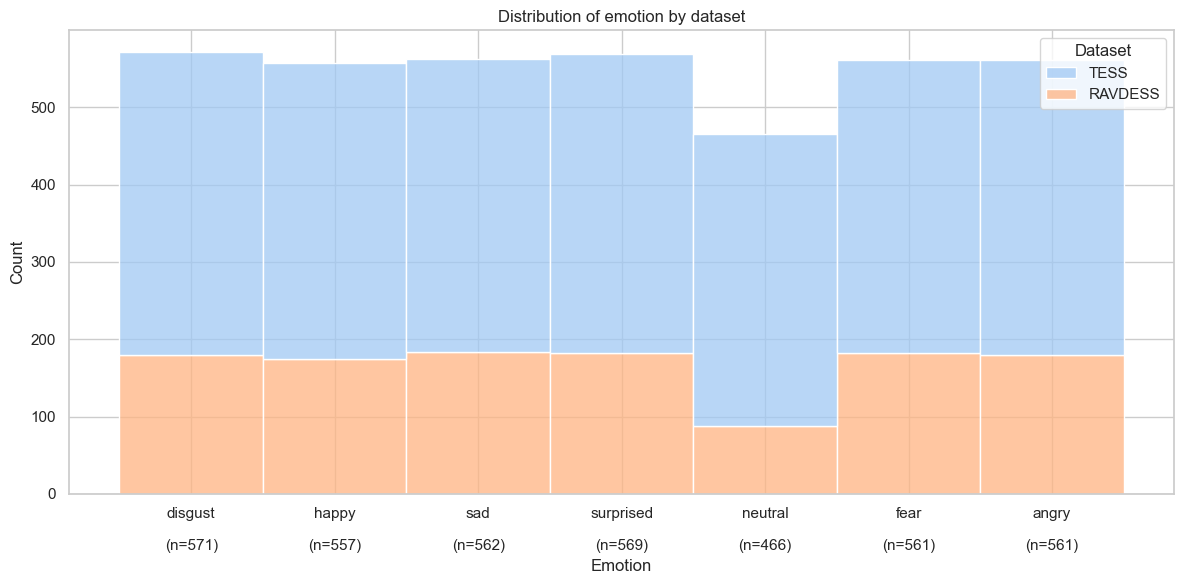

In [118]:
total_counts = combined_df["Emotion"].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(
    data=combined_df,
    x="Emotion",
    hue="Dataset",
    multiple="stack",
    bins=all_emotions,
    palette="pastel",
)
plt.title("Distribution of emotion by dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")

# Get current tick labels
current_ticks = plt.xticks()[0]
current_labels = plt.xticks()[1]

# Create new labels with counts
new_labels = [
    f"{label.get_text()}\n\n(n={total_counts[label.get_text()]})"
    for label in current_labels
]

# Set new tick labels
plt.xticks(current_ticks, new_labels)

plt.tight_layout()
plt.show()


#### Visualize sample audio signal using librosa

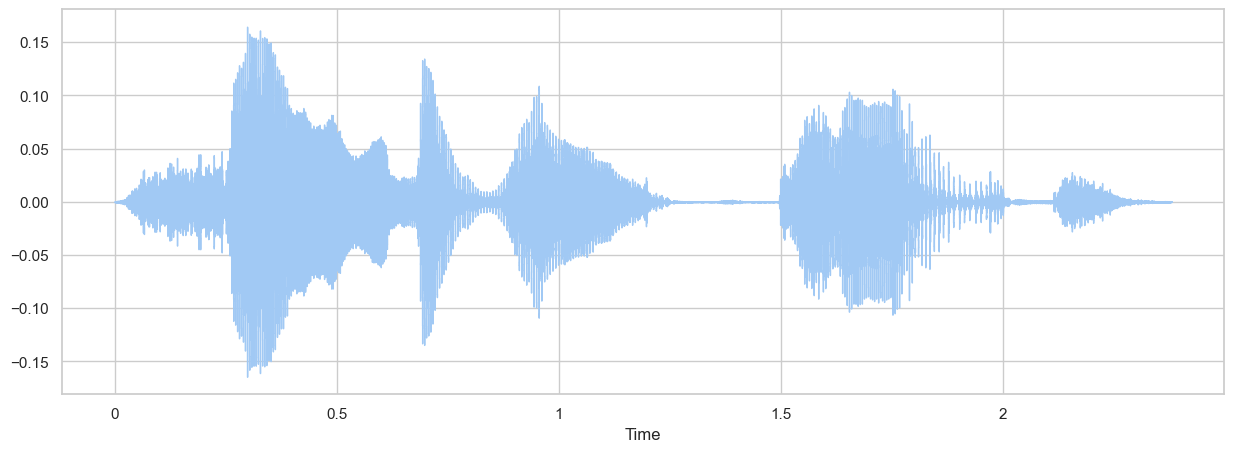

In [119]:
# YOUR CODE HERE

audio_path = tess_wav_files[0]

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()


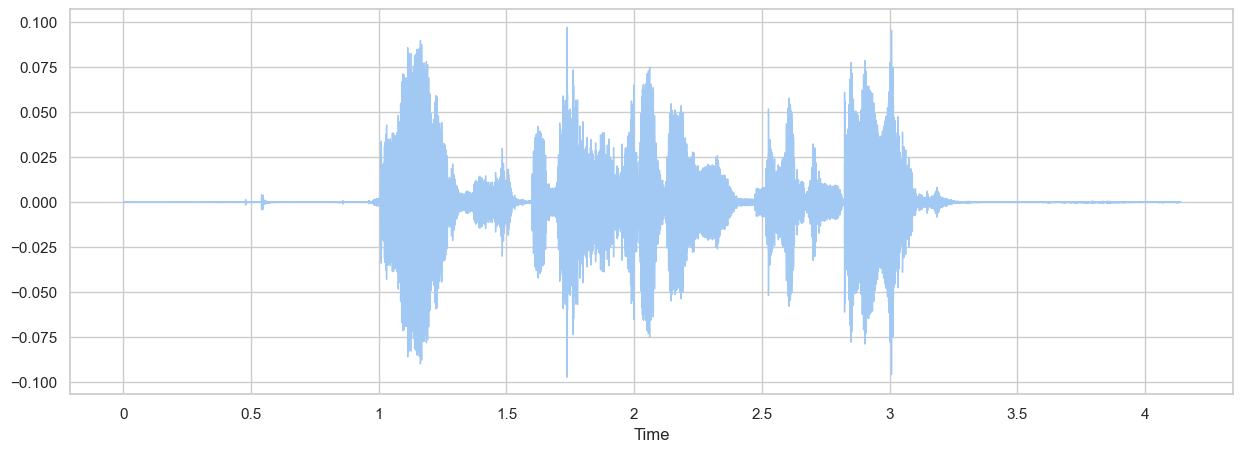

In [120]:
# visualize the ravdess wav file 0
audio_path = ravdess_wav_files[0]

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()


### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [121]:
# YOUR CODE HERE
def extract_feature(file_name):
    # load audio
    X, sample_rate = librosa.load(file_name)
    # apply stft()
    stft = np.abs(librosa.stft(X))
    result = np.array([])
    # compute mfcc
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    # combine the features
    result = np.hstack((result, mfccs))
    # compute chroma features and combine
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma))
    # compute melspectrogram and combine
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    return result


In [122]:
# sample feature extracted from tess dataset
sample_feature_tess = extract_feature(
    tess_wav_files[0]
)  # ,mfcc=True, chroma=True, mel=True)
sample_feature_tess.shape


(180,)

In [123]:
# sample feature extracted from ravdess dataset
sample_feature_ravdess = extract_feature(ravdess_wav_files[0])
sample_feature_ravdess.shape


(180,)

#### Create a dictionary or a function to encode the emotions

In [124]:
# YOUR CODE HERE
print(all_emotions)


['sad', 'disgust', 'fear', 'happy', 'angry', 'surprised', 'neutral']


In [125]:
emotions_encoded = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprised": 6,
}
emotions_encoded


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

#### TESS data feature extraction

In [126]:
# YOUR CODE HERE
tess_features, tess_labels = [], []

for counter in range(len(tess_wav_files)):
    # extracting features
    tess_features.append(extract_feature(tess_wav_files[counter]))
    # extracting label
    tess_labels.append(emotions_encoded[tess_emotions[counter]])

print(tess_features[:1])
# check if all the labels are encoded properly
print(set(tess_labels))


[array([-4.29389404e+02,  5.45358772e+01,  1.13645184e+00,  3.50506973e+01,
       -6.21782303e+00, -6.57453680e+00, -8.76031876e+00, -1.50195122e+01,
       -6.81600189e+00, -1.10762444e+01, -7.63420486e+00,  6.96993399e+00,
       -7.99828291e+00,  2.11784506e+00, -1.15748703e+00, -5.73576450e+00,
        3.66444921e+00, -1.35237348e+00, -1.00729752e+01,  2.72997642e+00,
       -8.34245300e+00,  6.33961201e-01, -2.54763198e+00,  1.33696151e+00,
       -6.12568855e-01, -4.23097074e-01, -2.10640240e+00,  3.34066010e+00,
       -1.01958632e+00,  6.12461138e+00,  1.51348162e+00,  5.83288860e+00,
        4.05004168e+00,  3.62735248e+00,  4.26284122e+00,  2.54775143e+00,
        2.55124426e+00,  3.34785724e+00,  1.34856927e+00,  2.27539110e+00,
        5.62264919e-01,  5.77137828e-01,  5.81698477e-01,  6.15864098e-01,
        5.73405087e-01,  5.81449091e-01,  5.86048007e-01,  5.92814028e-01,
        5.23266017e-01,  5.32438338e-01,  5.64917862e-01,  5.63793302e-01,
        7.01616099e-03, 

#### Ravdess data feature extraction

In [127]:
# YOUR CODE HERE
ravdess_features, ravdess_labels = [], []

for counter in range(len(ravdess_wav_files)):
    # extracting features
    ravdess_features.append(extract_feature(ravdess_wav_files[counter]))
    # extracting label
    ravdess_labels.append(emotions_encoded[ravdess_emotions[counter]])

print(ravdess_features[:1])
# check if all the labels are encoded properly
print(set(ravdess_labels))


[array([-5.86404602e+02,  6.64568100e+01, -9.37863922e+00,  2.53518429e+01,
       -1.54795275e+01,  2.58358955e+00, -2.05571022e+01, -5.72214603e+00,
       -1.37263117e+01,  3.15592909e+00, -1.03619165e+01, -8.93212223e+00,
        3.04361629e+00, -1.12941704e+01, -1.57636738e+00, -8.73570824e+00,
       -2.38166079e-01, -7.95672321e+00, -4.43287897e+00, -5.20783663e+00,
       -3.96612549e+00, -4.59769392e+00, -6.72506618e+00, -2.49397469e+00,
       -7.65339661e+00, -2.70855308e+00, -5.64375305e+00, -2.46526361e+00,
       -5.00371742e+00, -1.56028974e+00, -4.19597596e-01,  2.05233741e+00,
        3.49918771e+00,  1.25439382e+00,  3.71989131e+00,  8.41210485e-01,
        3.34664083e+00,  8.88095558e-01,  3.82912922e+00,  2.12164950e+00,
        5.37475824e-01,  5.14372289e-01,  5.06743431e-01,  5.28694868e-01,
        6.16754651e-01,  6.64664865e-01,  6.21167600e-01,  6.64651334e-01,
        7.13548839e-01,  7.06206799e-01,  6.30225480e-01,  5.53229749e-01,
        1.40453749e-05, 

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [128]:
# Combine TESS and RAVDESS features and labels
audio_features = tess_features + ravdess_features
emotion_labels = tess_labels + ravdess_labels

# Create a DataFrame
df_audio_features = pd.DataFrame(audio_features)
df_emotion_labels = pd.DataFrame(emotion_labels, columns=["Emotion"])

# Combine features and labels into one DataFrame
df_combined = pd.concat([df_audio_features, df_emotion_labels], axis=1)

# Save the DataFrame to a CSV file
df_combined.to_csv("combined_audio_features_and_emotion_labels.csv", index=False)

print("Dataframe saved with file name: combined_audio_features_and_emotion_labels.csv")


Dataframe saved with file name: combined_audio_features_and_emotion_labels.csv


#### Load data frame directly
Start here if audio file feature extraction is not required

In [130]:
# YOUR CODE HERE
df = pd.read_csv("combined_audio_features_and_emotion_labels.csv")
df.head(n=10)


,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Emotion
0,-429.389404,54.535877,1.136452,35.050697,-6.217823,-6.574537,-8.760319,-15.019512,-6.816002,-11.076244,...,0.006037,0.007167,0.004189,0.001337,0.001666,0.001728,0.001825,0.001800,0.000209,1
1,-383.886353,79.525940,-9.901229,13.141577,-7.526713,-11.980517,-12.694776,-11.484585,-9.669385,-2.018745,...,0.002052,0.002477,0.004122,0.002234,0.002000,0.002662,0.003666,0.002415,0.000241,1
2,-408.559753,61.850830,8.006745,15.967713,-4.401824,-9.296637,-9.562253,-14.415002,-12.541576,-4.508912,...,0.005181,0.005613,0.007086,0.003281,0.002151,0.004829,0.007337,0.009209,0.001612,1
3,-411.562988,81.165421,12.588036,1.731736,-4.764369,-1.514353,-8.505466,-14.651052,-9.094137,0.356467,...,0.006286,0.007780,0.005892,0.005487,0.001470,0.001655,0.003069,0.002639,0.000296,1
4,-440.550934,75.170311,7.926217,19.908348,-7.748478,-0.962208,-6.832746,-15.025624,-7.410315,-3.048750,...,0.002468,0.004426,0.004092,0.002439,0.000618,0.000782,0.001358,0.001976,0.000112,1
5,-406.892365,99.574677,3.500707,-0.432887,-18.327734,9.030172,-1.426410,-21.631735,0.085603,-2.790392,...,0.004205,0.006328,0.004950,0.002486,0.002008,0.001974,0.004181,0.003248,0.000448,1
6,-426.574615,50.796707,-0.945534,9.933541,-13.114386,8.300945,-9.926440,-21.215967,-8.426959,2.663502,...,0.002849,0.004529,0.004735,0.002198,0.001642,0.001558,0.001991,0.001582,0.000136,1
7,-424.627167,50.729664,3.153491,37.165176,-9.565288,-7.124362,-8.215972,-14.851522,-11.653219,-6.507973,...,0.003731,0.004270,0.003280,0.001524,0.001105,0.001024,0.002010,0.003468,0.000378,1
8,-424.237732,66.150459,3.114921,27.181040,-5.625822,-7.916844,-11.989532,-8.431285,-4.845958,-4.808508,...,0.003143,0.004633,0.003499,0.001330,0.000661,0.000701,0.000994,0.000597,0.000056,1
9,-426.811462,87.380554,0.488827,19.237406,-1.299392,-3.263818,-6.470073,-14.991146,-9.412653,-0.581742,...,0.001539,0.002404,0.003171,0.000879,0.000572,0.000566,0.000934,0.000986,0.000088,1


In [133]:
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Columns: 181 entries, 0 to Emotion
dtypes: float64(180), int64(1)
memory usage: 5.3 MB


0          float64
1          float64
2          float64
3          float64
4          float64
            ...   
176        float64
177        float64
178        float64
179        float64
Emotion      int64
Length: 181, dtype: object

In [134]:
y = df["Emotion"]
X = df.drop("Emotion", axis=1)

print(f"features : {X.columns}")
print(f"target : {y.name}")


features : Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '170', '171', '172', '173', '174', '175', '176', '177', '178', '179'],
      dtype='object', length=180)
target : Emotion


#### Split the data into train and test

In [135]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)


### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [152]:
# Train and evaluate different ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=101),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=101),
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=101),
    # "Support Vector Machine": SVC(kernel="linear", probability=True, random_state=101),
}

# Dictionary to store the accuracy and f1score of each model
model_accuracies = {}
model_f1_scores = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Calculate F1 score
    f1score = f1_score(
        y_test,
        y_pred,
        average="macro",
        #    average="weighted"
    )
    model_f1_scores[model_name] = f1score
    print(f"{model_name} F1 Score: {f1score:.4f}")

# Find the best model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]

print(
    f"\nBest Model: {best_model_name} with Accuracy: {model_accuracies[best_model_name]:.4f}"
)


# Find the best model based on F1 score
best_model_name_f1score = max(model_f1_scores, key=model_f1_scores.get)
best_model = models[best_model_name_f1score]

print(
    f"\nBest Model: {best_model_name_f1score} with F1 score: {model_f1_scores[best_model_name_f1score]:.4f}"
)


Logistic Regression Accuracy: 0.7909
Logistic Regression F1 Score: 0.7925
Decision Tree Accuracy: 0.7026
Decision Tree F1 Score: 0.7080
Random Forest Accuracy: 0.8571
Random Forest F1 Score: 0.8585

Best Model: Random Forest with Accuracy: 0.8571

Best Model: Random Forest with F1 score: 0.8585


In [151]:
# YOUR CODE HERE
tree.export_text(models["Decision Tree"])


'|--- feature_35 <= 16.62\n|   |--- feature_89 <= 0.01\n|   |   |--- feature_31 <= 7.02\n|   |   |   |--- feature_23 <= 13.50\n|   |   |   |   |--- feature_36 <= 14.23\n|   |   |   |   |   |--- class: 5\n|   |   |   |   |--- feature_36 >  14.23\n|   |   |   |   |   |--- class: 4\n|   |   |   |--- feature_23 >  13.50\n|   |   |   |   |--- class: 2\n|   |   |--- feature_31 >  7.02\n|   |   |   |--- feature_11 <= -3.88\n|   |   |   |   |--- feature_115 <= 0.00\n|   |   |   |   |   |--- class: 5\n|   |   |   |   |--- feature_115 >  0.00\n|   |   |   |   |   |--- class: 2\n|   |   |   |--- feature_11 >  -3.88\n|   |   |   |   |--- feature_122 <= 0.01\n|   |   |   |   |   |--- class: 5\n|   |   |   |   |--- feature_122 >  0.01\n|   |   |   |   |   |--- class: 0\n|   |--- feature_89 >  0.01\n|   |   |--- feature_20 <= 5.97\n|   |   |   |--- feature_26 <= 5.60\n|   |   |   |   |--- feature_147 <= 0.06\n|   |   |   |   |   |--- class: 6\n|   |   |   |   |--- feature_147 >  0.06\n|   |   |   |  

#### Apply the voting classifier

In [145]:
# Define the individual models
log_clf = LogisticRegression(max_iter=1000)
dt_clf = tree.DecisionTreeClassifier()
rf_clf = RandomForestClassifier(n_estimators=1000)
svm_clf = SVC(kernel="linear", probability=True)

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ("lr", log_clf),
        ("dt", dt_clf),
        ("rf", rf_clf),
        ("svm", svm_clf),
    ],
    voting="soft",
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")


Voting Classifier Accuracy: 0.8130


In [ ]:
# YOUR CODE HERE


### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [ ]:
# YOUR CODE HERE


#### Extracting features of team data and combine with TESS + Ravdess

In [ ]:
# YOUR CODE HERE


#### Train the different ML algorithms

In [ ]:
# YOUR CODE HERE


#### Test the best working model with live audio recording

In [ ]:
# choose the best working model and assign below
MODEL =


In [ ]:
# @title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists("ModelTesting/"):
    os.mkdir("ModelTesting/")


def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js("record(%d)" % (sec * 1000))
    b = b64decode(s.split(",")[1])
    with open("ModelTesting/audio_" + current_time + ".wav", "wb") as f:
        f.write(b)
    return "ModelTesting/audio_" + current_time + ".wav"


test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1, -1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)


### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).
